# Project: Wrangling and Analyze Data (WeRateDogs tweets)
### *Prepared by: Data Analyst Chukwudi Okereafor*

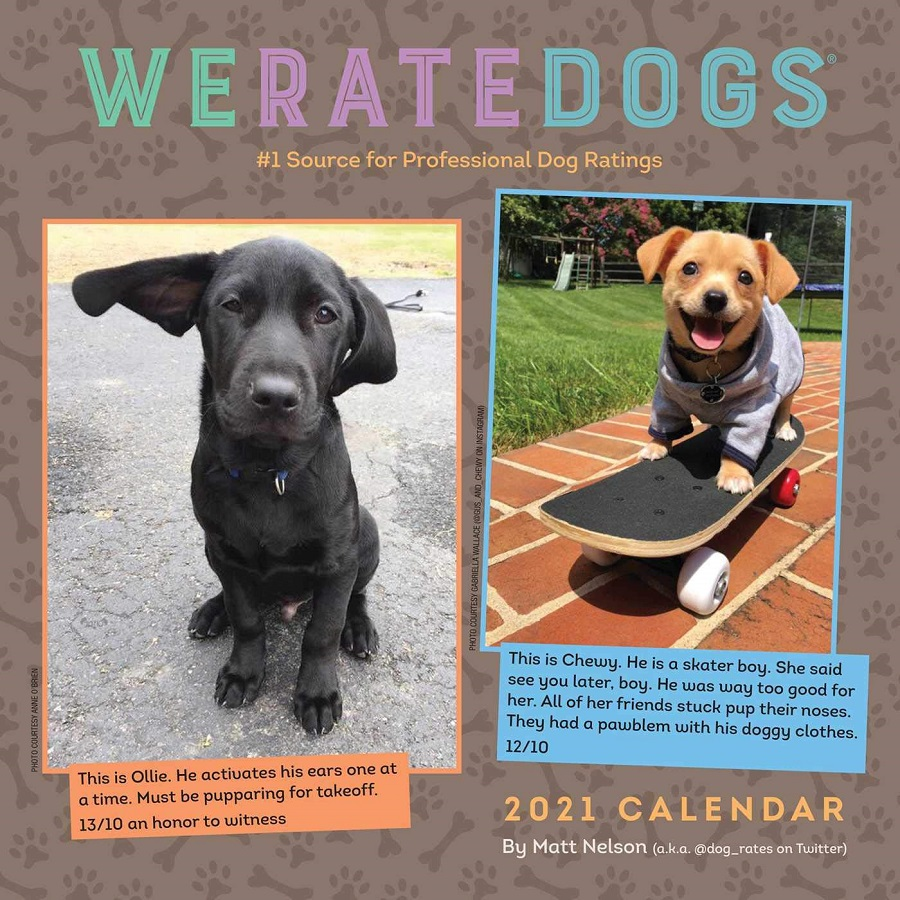

## Project Overview:
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter for breaking some of the laws.

In this project, Udacity is challenging me with the following task:
- Gather the werate dogs tweeter data using three different methods.
- Access the data and check for quality issues and tidyness issues.
- Clean the data.
- perform analysis and visualization (EDA).

## Table of Contents
<ul>
<li><a href="#intro">Importing relevant packages</a></li>
<li><a href="#wrangling">Data Gathering</a></li>
<li><a href="#wrangling">Accessing the Data</a></li>
<li><a href="#wrangling">Data Cleaning</a></li>
<li><a href="#wrangling">Data Storage</a></li>
<li><a href="#eda">Analysing and visualizing the Data(Exploratory Data Analysis)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Importing Relevant Packages
Here, I will import the dependencies for this project.

In [1]:
# For Data Manipulation
import numpy as np 
import pandas as pd  


# For Data visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# other necessary dependencies for extracting data
import os
import re
import requests
import json
import collections
import functools
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Data Gathering
In this phase, I will gather **all** three pieces of data for this project and load them in the notebook.     
Different methods will be used to load the data; one of which I do not yet have access to(Twitter API) becuase still waiting for authorization.

#### Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#loading the twitter csv file from local machine
weratedogs_df = pd.read_csv('twitter-archive-enhanced.csv')
weratedogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Using the Requests library to download the tweet image prediction (image_predictions.tsv)      
I will extract this file programmatically from udacity's server using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
# extracting the tweet image prediction file from a weblink
tweet_image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image_predictions.tsv', 'wb') as image_files:
    image_pred_gathered = requests.get(tweet_image_url)
    image_files.write(image_pred_gathered.content)

# Load extracted image prediction data into a dataframe
weratedogs_2_df = pd.read_csv('image_predictions.tsv', delim_whitespace=True)
weratedogs_2_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt).      
Since I have not yet gotten authorization from twitter (which of course I will get soon), I will follow the short-cut step for now given to me by Udacity.     
However, I will return to this section whenever I get an authentication key from twitter.

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = weratedogs_df.tweet_id.values
len(tweet_ids)

2356

In [5]:
###### THIS CODE TAKES ALOT OF TIME TO RUN
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.errors.TweepyException as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [6]:
# Create a dataframe from the extracted tweet_json.txt
weratedogs = []
with open('tweet-json.txt') as data_file:
    for j in data_file:
        data1 = collections.OrderedDict()
        data2 = json.loads(j)

        # Get all of the data we're interested in
        data1['tweet_id'] = data2['id']
        data1['retweet_count'] = data2['retweet_count']
        data1['favorite_count'] = data2['favorite_count']

        # Append it to the data gathering list
        weratedogs.append(data1)

# Create a dataframe from the data
weratedogs_3_df = pd.DataFrame(weratedogs)
weratedogs_3_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, I will these datasets in two different ways. 
- visually
- programmatically     
And on each of these datasets, we will investigate for quality and tidyness.

In [7]:
weratedogs_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Programmatic accessment

In [8]:
#check and count for null values 
weratedogs_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
#data information
weratedogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# count duplicates
weratedogs_df.duplicated().sum()

0

In [11]:
weratedogs_df.source.duplicated().sum()

2352

In [12]:
weratedogs_2_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


#### Programmatic accessment

In [13]:
# count duplicates
weratedogs_2_df.duplicated().sum()

0

In [14]:
#data information
weratedogs_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#check and count for null values 
weratedogs_2_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
weratedogs_3_df.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


#### Programmatic Accessment

In [17]:
# count duplicates
weratedogs_2_df.duplicated().sum()

0

In [18]:
#check and count for null values 
weratedogs_2_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [19]:
#data information
weratedogs_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
1.  There are a lot of null values in `weratedogs_df`.

2.  Some columns in `weratedogs_df` have `None` as value. Pandas will not see this as a `Null` value.

3.  There are some meaningless or invalid names in the `name` column, in the `weratedogs_df`.

4.  In the `weratedog_2_df`, dog prediction 1, 2 and 3 (`p1_dog`, `p2_dog`, `p3_dog`) are three different predictions of a particular dog breed. A column that selects only the best prediction (p*_conf) from the 3 prediction columns would be better.

5.  The source column is not a useful column; the values in it are the same and unneccessary.

6.  `in_reply_to_status_id` and `in_reply_to_user_id` are not needed. They both also contain invalid values.

7.  Some of the columns need to be renamed to for the dataset to be understandable.

8.  To the best of my knowledge, `timestamp` is usually a set of 10 digit numbers (for seconds). The `timestamp` column in the `weratedogs_df` can be converted to `datetime` datatype.
9.  Remove retweets.

### Tidiness issues
1.  All the neccessary columns have to be in one dataframe.

2.  In the `weratedogs_df`, columns like `doggo`, `floofer`, `pupper` and `puppo` are not supposed to be columns. They are types of dogs. They have to be as values in a single column like `dog_type`. 

## Cleaning Data
In this section, I will clean **all** of the issues documented while assessing. 

However, a copy of the original datasets will be used here according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [20]:
# Make copies of original pieces of the three datasets
weratedogs_df_clean = weratedogs_df.copy()
weratedogs_2_df_clean = weratedogs_2_df.copy()
weratedogs_3_df_clean = weratedogs_3_df.copy()

### Issue #1:

#### Define:     
Replace `None` values in the `doggo`, `floofer`, `pupper`, `puppo` columns with empty whitespace.

#### Code

In [21]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
weratedogs_df_clean[columns] = weratedogs_df_clean[columns].replace('None', '')

#### Test

In [22]:
weratedogs_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


### Issue #2:     

#### Define:      
Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns into a single column named `dog_type` and the drop the four columns. 

#### Code

In [23]:
# Combine columns and convert empty strings to NaN
dog_type = [weratedogs_df_clean[col] for col in columns]
weratedogs_df_clean['dog_type'] = functools.reduce(lambda col_main, col_add: col_main.str.cat(col_add, ', '), 
                                                         dog_type)
weratedogs_df_clean['dog_type'] = weratedogs_df_clean['dog_type'].str.strip(', ')
weratedogs_df_clean['dog_type'] = weratedogs_df_clean['dog_type'].apply(lambda x: x.replace(', ', '', 
                                                                                                        x.count(',')-1))
weratedogs_df_clean['dog_type'] = weratedogs_df_clean['dog_type'].replace('', np.nan)

#dropping the four dog columns
weratedogs_df_clean = weratedogs_df_clean.drop(columns=columns)

#### Test

In [24]:
weratedogs_df_clean.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN


### Issue #3:     

#### Define:     
convert `timestamp` to datetime datatype.

#### Code

In [25]:
# Change timestamp columns to datetime
time_stamp = [ts for ts in weratedogs_df_clean.columns.tolist() if 'timestamp' in ts]
for ts_col in time_stamp:
    weratedogs_df_clean[ts_col] = pd.to_datetime(weratedogs_df_clean[ts_col])

#### Test

In [26]:
weratedogs_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #4:     

#### Define:      

Creating a column that predicts the best `P*_conf` value of dog breed in the image from the 3 prediction(`p1_dog`, `p2_dog`, `p3_dog`) columns.

#### Code

In [27]:
# create 2 empty lists to save our choice for each row in the dataset
breed = []
prediction = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_prediction(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        prediction.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        prediction.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        prediction.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        prediction.append(0)
        
# call function using pandas apply by columns
weratedogs_2_df_clean.apply(breed_prediction, axis=1)

# add lists created to master dataframe
weratedogs_2_df_clean['breed'] = breed
weratedogs_2_df_clean['pred_confidence'] = prediction

weratedogs_2_df_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 
                               'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

#### Test:

In [28]:
weratedogs_2_df_clean.head()

,tweet_id,jpg_url,img_num,breed,pred_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Issue #4:     

#### Define:      
There are some meaningless or invalid names(or dog names) in the `name` column of the `weratedogs_df`. Here, I will sort out the meaningfull dog names in the column and then turn the strange ones to `Null`. I observed that the strange names are just values as a result of split sentences.

#### Code:

In [29]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
# Remove 'a' and 'an'
for index, row in weratedogs_df_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern, row['text'])[0]
            weratedogs_df_clean.loc[index,'name'] = weratedogs_df_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern, row['text'])[0]
            weratedogs_df_clean.loc[index,'name'] = weratedogs_df_clean.loc[index,'name'].replace('an', c_name)
    except IndexError:
        weratedogs_df_clean.loc[index,'name'] = np.nan

#### Test:

In [30]:
weratedogs_df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352         NaN
2353         NaN
2354         NaN
2355        None
Name: name, Length: 2356, dtype: object

### Issue #5:     

#### Define:     
Merge the 3 dataframes into 1 master dataframe

#### Code:

In [31]:
# Merge the first two dataframeas
master_df = pd.merge(weratedogs_df_clean, weratedogs_2_df_clean, on=['tweet_id','tweet_id'],how='left')

In [32]:
# merging the last dataframe with the master_df
weratedogs_master_df = pd.merge(master_df, weratedogs_3_df_clean, on=['tweet_id','tweet_id'],how='left')

#### Test:

In [33]:
weratedogs_master_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,breed,pred_confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Unknown,0.000000,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328.0,25461.0


In [34]:
weratedogs_master_df.shape

(2356, 20)

### Issue #6:    
#### Define:      
Remove retweets:     
Here, I will remove tweets that were copied and shared by another user or replies to tweets. We can know which observation is a retweet or a reply from the `retweet_status_id` and the `in_reply_to_status_id` column.

#### Code:

In [35]:
# Remove retweets
weratedogs_master_df = weratedogs_master_df[weratedogs_master_df.retweeted_status_id.isnull()]

# Remove responses
weratedogs_master_df = weratedogs_master_df[weratedogs_master_df.in_reply_to_status_id.isnull()]

# Remove tweets that do not have images
weratedogs_master_df = weratedogs_master_df[weratedogs_master_df.jpg_url.notnull()]

#### Test:

In [36]:
weratedogs_master_df.shape

(1971, 20)

### Issue #6:     

#### Define:     
Drop all unneccessary columns

#### Code

In [37]:
weratedogs_master_df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 
                                   'retweeted_status_id', 'retweeted_status_user_id', 
                                   'retweeted_status_timestamp'], inplace=True)

### Test:

In [38]:
weratedogs_master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,breed,pred_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Unknown,0.000000,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,9774.0,41048.0


In [39]:
weratedogs_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   text                1971 non-null   object             
 3   expanded_urls       1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1931 non-null   object             
 7   dog_type            303 non-null    object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  breed               1971 non-null   object             
 11  pred_confidence     1971 non-null   float64            
 12  retweet_count       1971 non-null 

### Issue #7:     

#### Define:      
Renaming the columns to a clear understanding of the dataset.

In [40]:
# Rename columns to make easier to understand for someone not familiar with the original data sets
weratedogs_master_df = weratedogs_master_df.rename(columns = {'timestamp':'tweet_date',
                           'text': 'tweet_text',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_rating',
                           'name': 'dog_name',
                           'favorite_count':'no_of_likes',
                           'jpg_url': 'image_link',
                           'breed': 'dog_breed'})

#### Test:

In [41]:
weratedogs_master_df.head(2)

,tweet_id,tweet_date,tweet_text,tweet_url,dog_rating,rating_denominator,dog_name,dog_type,image_link,img_num,dog_breed,pred_confidence,retweet_count,no_of_likes
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Unknown,0.000000,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514.0,33819.0


In [42]:
weratedogs_master_df.columns

Index(['tweet_id', 'tweet_date', 'tweet_text', 'tweet_url', 'dog_rating',
       'rating_denominator', 'dog_name', 'dog_type', 'image_link', 'img_num',
       'dog_breed', 'pred_confidence', 'retweet_count', 'no_of_likes'],
      dtype='object')

In [43]:
weratedogs_master_df.shape

(1971, 14)

## Storing Data
In this section, I will save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [44]:
# Save a copy of the dataframe to csv for future reference
weratedogs_master_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Most common dog breed

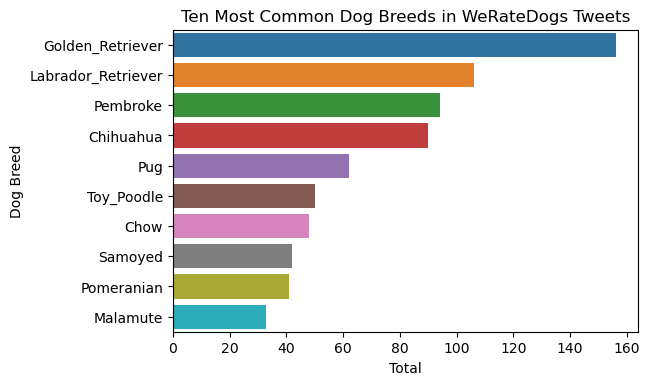

In [45]:
# Plot counts of the 10 most common dog breeds
top_breeds = (weratedogs_master_df[weratedogs_master_df.dog_breed != 'Unknown'].dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

### Most common dog type

In [46]:
# Creating a class distribution in a dataframe
weratedogs_master_df['dog_type'].value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

C:\Users\PANDORA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


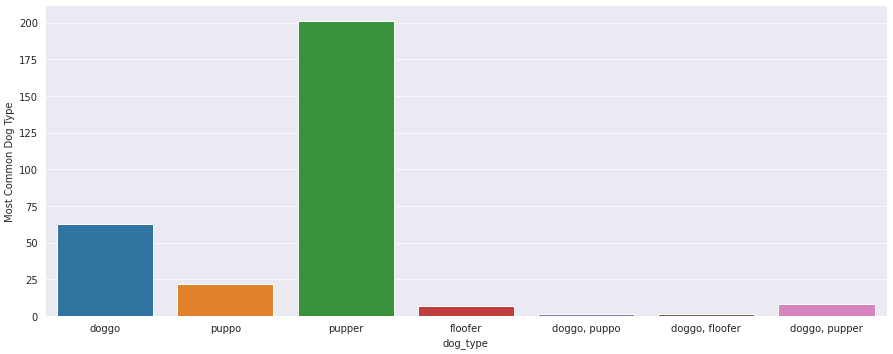

In [47]:
# Visualising the dog_type count
with sns.axes_style('darkgrid'):
    g = sns.catplot("dog_type", data=weratedogs_master_df, aspect=2.5, kind='count')
    g.set_ylabels("Most Common Dog Type");

### Total tweets per month

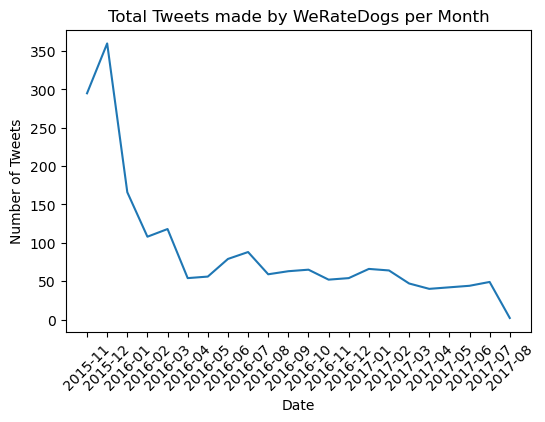

In [48]:
# Prepare tweet_archive for plotting
weratedogs_master_df['year_month_date'] = weratedogs_master_df['tweet_date'].dt.year.astype(str) + '-' + \
                                            weratedogs_master_df['tweet_date'].dt.month.astype(str).str.pad(2, fillchar='0')
weratedogs_master_df['is_tweet'] = np.where(weratedogs_master_df.tweet_id.notnull(), 1, 0)

# Get required data from twitter_archive
twitter_archive_monthly_tweets = weratedogs_master_df.groupby('year_month_date').is_tweet.sum().reset_index()

# Plot the data
plt.figure(dpi=100);
plt.xticks(rotation=45);
ax = sns.lineplot(x='year_month_date', y='is_tweet', data=twitter_archive_monthly_tweets);
ax.set_title('Total Tweets made by WeRateDogs per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of Tweets');

In [49]:
dog_types = weratedogs_master_df[['dog_type', 'no_of_likes']]
dog_types = dog_types[dog_types.dog_type.notnull()]
dog_types.groupby('dog_type').sum()

,no_of_likes
dog_type,
doggo,1219452.0
"doggo, floofer",17169.0
"doggo, pupper",105759.0
"doggo, puppo",47844.0
floofer,92442.0
pupper,1457356.0
puppo,474806.0


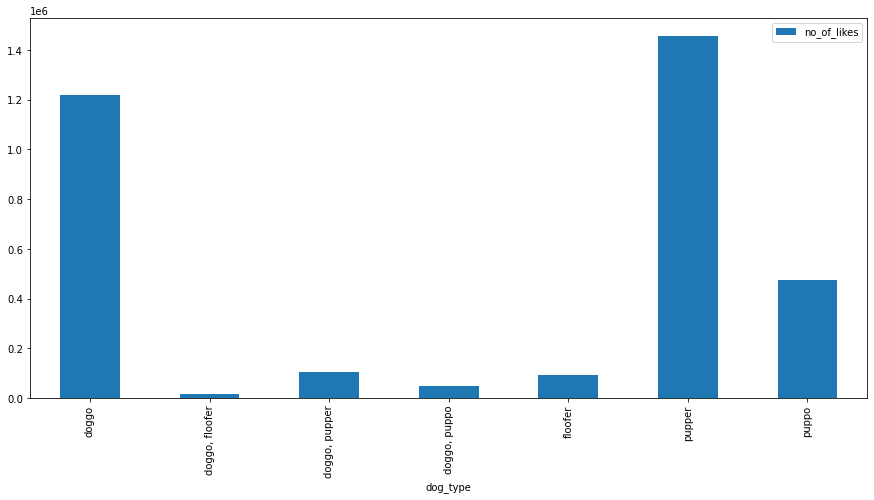

In [50]:
dog_types.groupby('dog_type').sum().plot(kind="bar", figsize=(15, 7));

### Insights:
1. Weratedogs tweeting fell drastically overtime. This could be as a result of when the twitter handle was suspended by Twitter.

2. Pupper is the most common dog type

3. Golden_Retriever is the most common breed.

4. The Doggo is mostly liked by dog lovers.